## Week 1 Project Notebook (Descriptive Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/zip.train", header=None , sep=" ")


In [3]:
#To remove all columns that contain any elements that are not numbers, use df.dropna 

clean_data = data.dropna(axis=1, how='any',thresh=None)

#To replace NaN with something, use df.fillna 


In [4]:
#Group all of the data, which correspond to the same number(0-9), together

def is_num(num) :
    return pd.DataFrame(clean_data[clean_data[0]==num]) 

In [5]:
#Remove the first column (the number label) from each df...still cleaning

def only_num(num) :
    return pd.DataFrame((is_num(num)).drop((is_num(num)).columns[[0]],axis=1))
    

In [6]:
#Trying out referencing a specific value in the DataFrame




In [7]:
#Find the average grayscale proportion for each position and number
#Calculate the standard deviation while we're at it

def avg_num(num) :
    return np.mean(only_num(num))

def std_num(num) :
    return np.std(only_num(num).std())


In [8]:
#Remove outliers based on Z-Score...not quite there yet... TO DO!

def outliers_z_score(num):
    threshold = 3
    zscores = 0
    i = 0
    j = 0
    while i < len(only_num(num)) : #break it into chunks to reduce the time it takes to run
        
        while j < 256 :
            zscores = ((only_num(num).iloc[i,j])-(avg_num(num)))/std_num(num)
            j += 1
        i += 1
    return np.where(np.abs(zscores) > threshold)

outliers_z_score(1)

(array([  7,   8,  23,  24,  39,  40,  55,  56,  71,  72,  73,  87,  88,
         89, 103, 104, 105, 118, 119, 120, 121, 134, 135, 136, 150, 151,
        152, 166, 167, 168, 182, 183, 184, 198, 199, 200, 214, 215, 216,
        231, 232, 247, 248]),)

Text(0.5,1,'Average grayscale proportion for number 0')

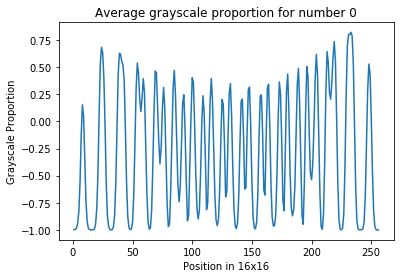

In [9]:
#Plot the average value of each 16x16 location grouped by number

def fig_avg(num) :
    fig = (avg_num(num)).plot()
    fig = plt.xlabel("Position in 16x16")
    fig = plt.ylabel("Grayscale Proportion")
    fig = plt.title("Average grayscale proportion for number " + str(num))
    
    return fig
    
fig_avg(0)    
    

In [10]:
#Find the peak of the plot above

def peak(num):
    ymax = round(max(avg_num(num)),4)
    xmax = np.argmax(avg_num(num))
    return xmax 


In [11]:
#Find the lowest valley of the plot above

def valley(num):
    ymin = round(min(avg_num(num)),4)
    xmin = np.argmin(avg_num(num))
    return xmin

/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9')]

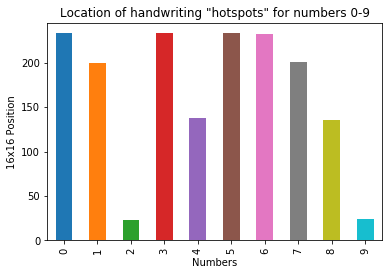

In [12]:
#Create two lists: one with digits 0-9 and the other with the corresponding max as above

x_values = []
y_values = []

i=0

while i < 10 :
    x_values.append(i)
    y_values.append(peak(i))
    i += 1  


hotspot_series = pd.Series.from_array(y_values)
ax = hotspot_series.plot(kind='bar')
ax.set_title('Location of handwriting "hotspots" for numbers 0-9')
ax.set_xlabel('Numbers')
ax.set_ylabel('16x16 Position')
ax.set_xticklabels(x_values)

In [13]:
y_values

[233, 200, 23, 233, 138, 233, 232, 201, 136, 24]

The "hotspot" position is very similar for zero, five, and six. See the images in the second notebook.

/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


[Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6'),
 Text(0,0,'7'),
 Text(0,0,'8'),
 Text(0,0,'9')]

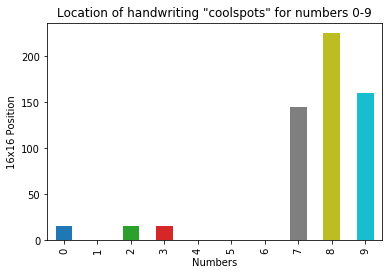

In [14]:
#Create two lists: one with digits 0-9 and the other with the corresponding min or valleys

x_values = []
y_values = []

i=0

while i < 10 :
    x_values.append(i)
    y_values.append(valley(i))
    i += 1 


coolspot_series = pd.Series.from_array(y_values)
fig = coolspot_series.plot(kind='bar')
fig.set_title('Location of handwriting "coolspots" for numbers 0-9')
fig.set_xlabel('Numbers')
fig.set_ylabel('16x16 Position')
fig.set_xticklabels(x_values)

In [15]:
y_values

[16, 1, 16, 16, 1, 1, 1, 145, 225, 160]

This makes sense; for the numbers one, four, five, six (and even zero, two and three) the upper left corner is rarely used.

In [16]:
# A close-up version of the mean plot for number one
#fig_11 = avg_1[:50].plot()

#fig_11 = plt.xlabel("Position in 16x16")
#fig_11 = plt.ylabel("Grayscale Proportion")
#fig_11 = plt.title("Close up version of above")

#fig_avg(1)

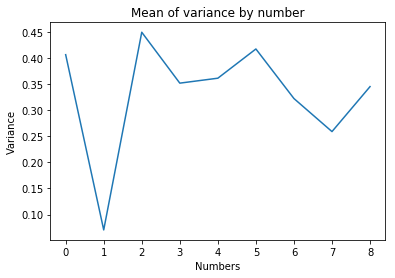

In [17]:
#Average variance for each of the numbers...is this a thing?

number_var= []
x_list = []
i = 0
while i < 9 :
    numbers = [only_num(i)]
    x_list.append(i)
    i += 1
    for number in numbers :
        var_num = np.var(number)
        avg_var_num = var_num.mean()
        number_var.append(avg_var_num)



fig_var = plt.plot(x_list, number_var)
fig_var = plt.xlabel("Numbers")
fig_var = plt.ylabel("Variance")
fig_var = plt.title("Mean of variance by number")


One, two, five... these make sense. What's up with zero?

In [18]:
#If it's not already clear, there is the most variance with number two
ymax = max(number_var)
xmax = np.argmax(number_var)
xmax

2

Shifting gears, let's make some pictures!

In [19]:
#Recreating numbers based on their median values

def median_picture(num) :
    median = only_num(num).median()
    image = median.values.reshape((16,16))
    image_plot = plt.imshow(image, cmap=plt.get_cmap('cool'), interpolation= 'nearest')
    image_show = plt.show()
    return image_show

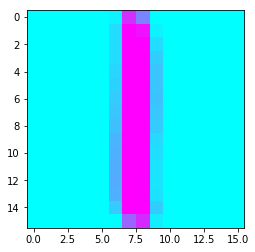

In [20]:
median_picture(1)

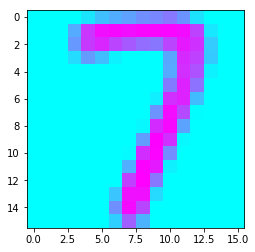

In [21]:
median_picture(7)

In [22]:
only_num(0).median().iloc[0:2]
#only_num(0).iloc[1,247]

1   -1.0
2   -1.0
dtype: float64

In [23]:
def find_non_ones(input_df) :
    input_df = pd.DataFrame(input_df)
    i = 0
    non_ones_list = []
    
    while i < len(input_df.median()) : 
        if abs(input_df.median().iloc[i]) != 1 :
            non_ones_list.append(i)
        i += 1
        
    non_ones_df = pd.DataFrame(non_ones_list)
    
    return non_ones_df    
find_non_ones(only_num(8))

,0
0,5
1,6
2,7
3,8
4,9
5,10
6,19
7,20
8,21
9,22


In [36]:
def find_non_ones_test(input_df) :
    input_df = pd.DataFrame(input_df)
    i = 0
    non_ones_list = []
    
    while i < len(input_df) : 
        if abs(input_df.iloc[i]) != 1 :
            non_ones_list.append(i)
        i += 1
        
    non_ones_df = pd.DataFrame(non_ones_list)
    
    return non_ones_df    




In [25]:
zero = pd.DataFrame()
one = pd.DataFrame()
two = pd.DataFrame()
three = pd.DataFrame()
four = pd.DataFrame()
five = pd.DataFrame()
six = pd.DataFrame()
seven = pd.DataFrame()
eight = pd.DataFrame()
nine = pd.DataFrame()

zero = find_non_ones(only_num(0))
one = find_non_ones(only_num(1))
two = find_non_ones(only_num(2))
three = find_non_ones(only_num(3))
four = find_non_ones(only_num(4))
five = find_non_ones(only_num(5))
six = find_non_ones(only_num(6))
seven = find_non_ones(only_num(7))
eight = find_non_ones(only_num(8))
nine = find_non_ones(only_num(9))

In [26]:
list_of_length = [len(zero), len(one),len(two),len(three),len(four),len(five),len(six),len(seven),len(eight),len(nine)]
list_of_length

[133, 46, 114, 109, 91, 116, 107, 85, 123, 97]

In [37]:
testinput = pd.DataFrame(clean_data.drop((clean_data).columns[[0]],axis=1))

testinput = pd.DataFrame(testinput.iloc[1])

#Transform from series to df
#len(testinput)

In [38]:
abs(.iloc[2])

SyntaxError: invalid syntax (<ipython-input-38-2b121b611c35>, line 1)

In [39]:
find_non_ones_test(testinput)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
zero = zero.values.tolist()
one = one.values.tolist()
two = two.values.tolist()
three = three.values.tolist()
four = four.values.tolist()
five = five.values.tolist()
six = six.values.tolist()
seven = seven.values.tolist()
eight = eight.values.tolist()
nine = nine.values.tolist()

In [ ]:
zerolist = []
i = 0
while i < len(zero) :
    zerolist.append(zero[i][0])
    i += 1

fivelist = []
while i < len(zero) :
    zerolist.append(zero[i][0])
    i += 1

In [ ]:
#def test_zero(input_df) :
    good_count = 0
    bad_count = 0
    
    for i in zerolist :
        if (input_df.iloc[i]) == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return good_count,bad_count



def test_one(input_df) :
    good_count = 0
    bad_count = 0
    for i in one :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_two(input_df) :
    good_count = 0
    bad_count = 0
    for i in two :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_three(input_df) :
    good_count = 0
    bad_count = 0
    for i in three :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_four(input_df) :
    good_count = 0
    bad_count = 0
    for i in four :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_five(input_df) :
    good_count = 0
    bad_count = 0
    for i in fivelist :
        if input_df.iloc[i] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_six(input_df) :
    good_count = 0
    bad_count = 0
    for i in six :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_seven(input_df) :
    good_count = 0
    bad_count = 0
    for i in seven :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_eight(input_df) :
    good_count = 0
    bad_count = 0
    for i in eight :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

def test_nine(input_df) :
    good_count = 0
    bad_count = 0
    for i in nine :
        if input_df.iloc[i][0] == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return string

In [ ]:
testinput = pd.DataFrame(clean_data.drop((clean_data).columns[[0]],axis=1))

testinput = testinput.iloc[1]


In [ ]:
def test_zero(input_df) :
    good_count = 0
    bad_count = 0
    
    for i in zerolist :
        if int(input_df.iloc[i+1]) == -1 :
            bad_count += 1
        else :
            good_count += 1
    if good_count > bad_count :
        sting = "Pass"
    else :
        string = "Fail"
    return good_count,bad_count

In [ ]:
df = pd.DataFrame()
df = only_num(0).median()
i=0
while i < df.shape[0] :
    if df.iloc[i] == -1 :
        df = df.drop(df.index[[i]])
    i += 1

#only_num(0).median().shape[0]

In [ ]:
def lose_ones


df_zero = pd.DataFrame()
df_zero = only_num(0).median()
i=0
while i < df_zero.shape[0] :
    if df_zero.iloc[i] == -1 :
        df_zero = df_zero.drop(df_zero.index[[i]])
    i +=1

df_zero

In [ ]:
zerolist[0:10]

In [ ]:
only_num(0).median()

In [ ]:
test_zero(testinput)

In [ ]:
test_one(testinput)

In [ ]:
test_two(testinput)

In [ ]:
test_three(testinput)

In [ ]:
test_four(testinput)

In [ ]:
test_five(testinput)

In [ ]:
test_six(testinput)

In [ ]:
test_seven(testinput)

In [ ]:
test_eight(testinput)

In [ ]:
test_nine(testinput)

In [ ]:
clean_data.iloc[1].head()

In [ ]:
zero[:5]